<h2> Wine's type classification exercise</h2>
<p>Developing a short Data Science analysis to predict wine types given the concentration of some chemicals.</p>
<p> - EDA, training of classifiers, and model selection are done within this analysis.</p>
<p> - This one is a short review exercise on the application to the doctoral position in environmental epidemiology and exposure modelling offered by the UGA and Ben-Gurion universities.</p>

<h3>1. Importing the required libraries</h3>
<p>Loading the libraries that are going to be used during the exercise.</p>

In [21]:
#Importing the required libraries.
import math
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import sys
import scipy.stats
import csv
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
#Running developed functions.
%run -i '/home/juan-david/Documents/data_science/UGA_phd/UGA_exercise_functions_help.py'

<h3>2. Loading data</h3>
<p>Loading the data from a cvs file.</p>

In [22]:
df = pd.read_csv('/home/juan-david/Documents/data_science/UGA_phd/wine.csv')

In [3]:
#Check dataframe shape.
print(df.shape)
df.head(10)

(178, 14)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
#Check if dataframe contains object type columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<h3>Obtaining test sets</h3>
<p>The data is splitted since the beginning to obtain a test set.</p>
<p> - The test set is used to check a model's generalization after doing cross-validation over training, and validation data.</p>

In [5]:
#Spliting data to have train, evaluation, and test sets.
#Finding test sets.
X, X_test, y, y_test = train_test_split(df.drop(labels=['Wine'], axis=1), df['Wine'],test_size=0.2, random_state =0)
#Check the new shapes.
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


<h3>3. Exploratory data analysis</h3>
<p>EDA over features and target variables.</p>
<p> - Box plots are created to check the ranges of real variables.</p>
<p> - Histograms are created to see how is the distribution of these variables (relevant for checking normality assumptions).</p>
<p> - For variables having outlayers, the associated rows are deleted.</p>
<p> - Bar plots are created to check how the classes on the target variable are populated.</p>

In [6]:
#Desccribe real variables in dataframe.
print(X.describe())

          Alcohol  Malic.acid         Ash         Acl          Mg     Phenols  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean    12.984859    2.372606    2.366901   19.554930  100.063380    2.258662   
std      0.807175    1.115360    0.269684    3.442549   14.249158    0.611691   
min     11.030000    0.740000    1.360000   10.600000   70.000000    1.100000   
25%     12.347500    1.602500    2.222500   17.250000   89.000000    1.705000   
50%     13.040000    1.895000    2.360000   19.500000   98.000000    2.210000   
75%     13.637500    3.222500    2.560000   21.500000  106.750000    2.735000   
max     14.750000    5.650000    3.220000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoid.phenols     Proanth   Color.int         Hue  \
count  142.000000            142.000000  142.000000  142.000000  142.000000   
mean     1.949155              0.363521    1.606056    5.045211    0.953352   
std      0.975921              0.

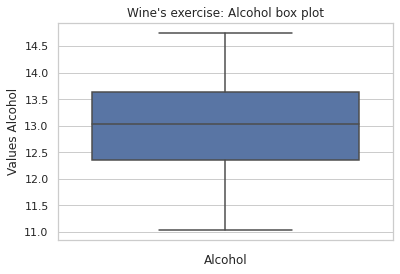

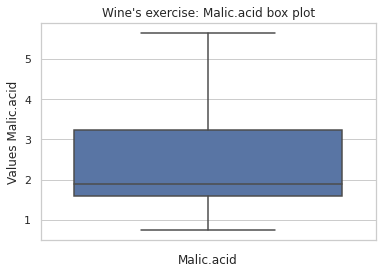

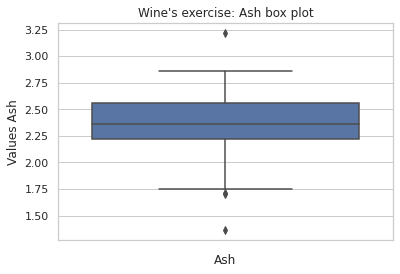

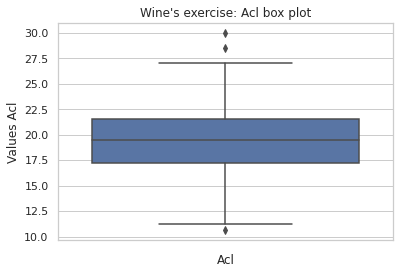

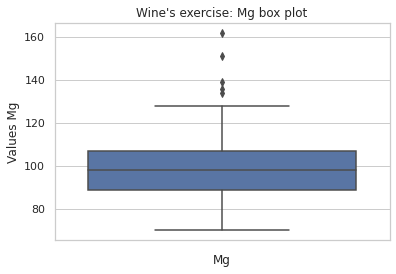

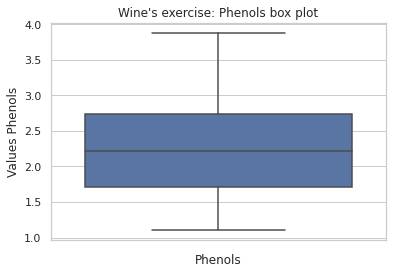

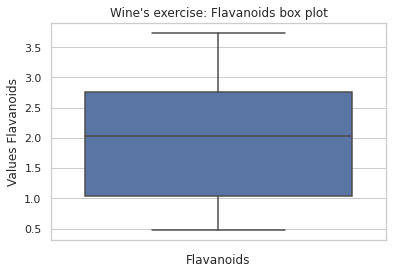

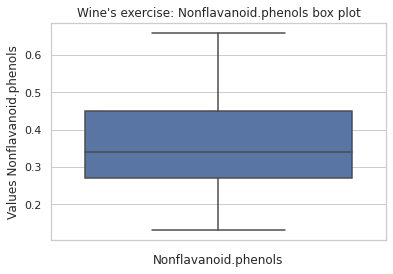

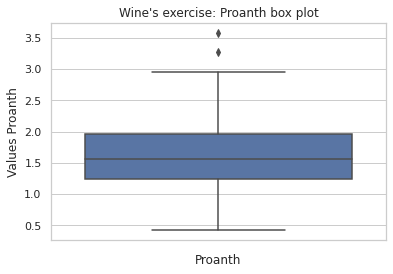

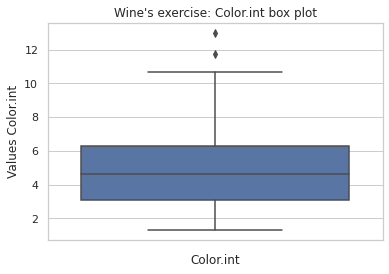

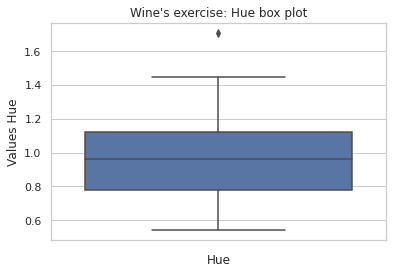

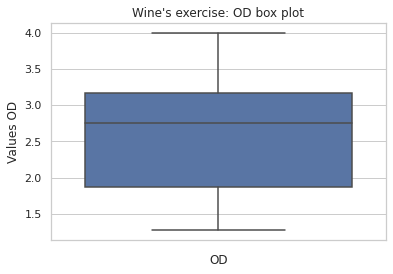

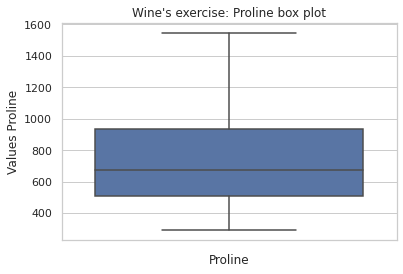

In [7]:
#Box plots for real variables.
plot_box_plots_real_variables(X)

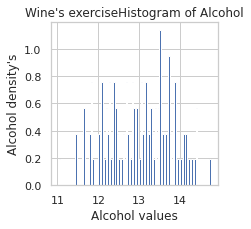

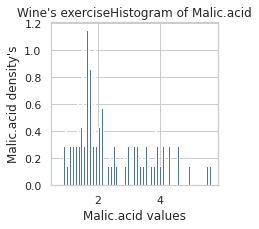

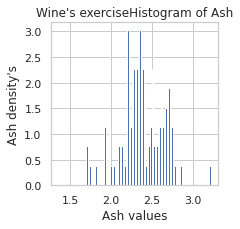

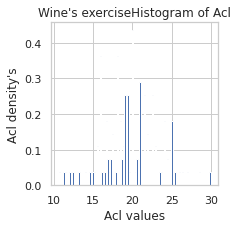

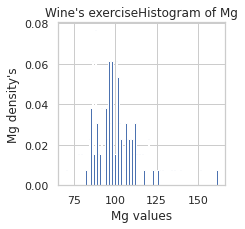

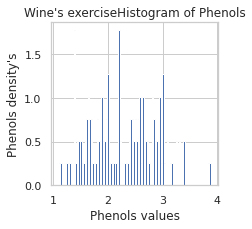

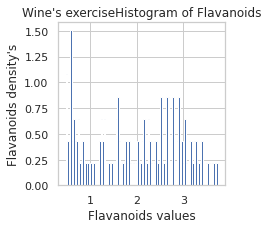

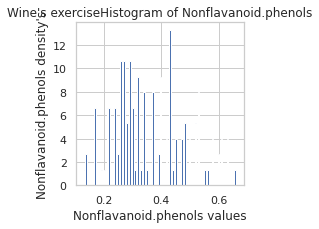

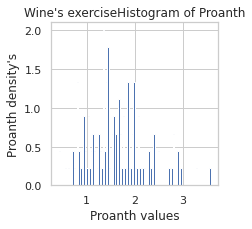

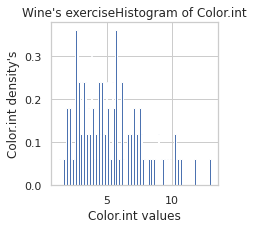

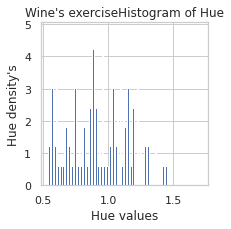

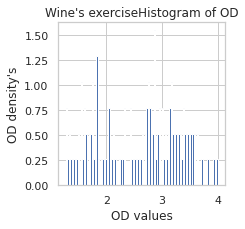

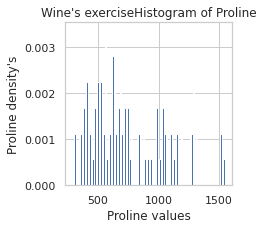

In [8]:
#Histograms for real variables.
plot_histograms_real_variables(X)

(128, 13)
(128,)


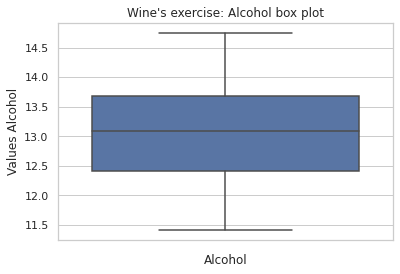

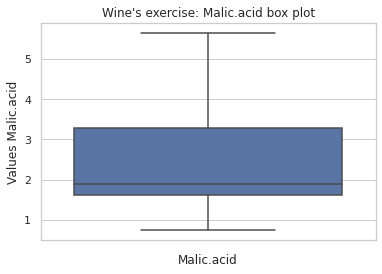

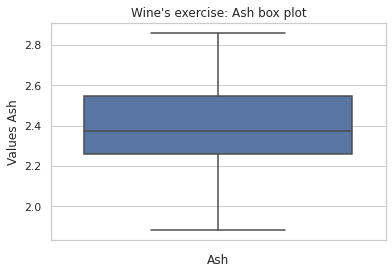

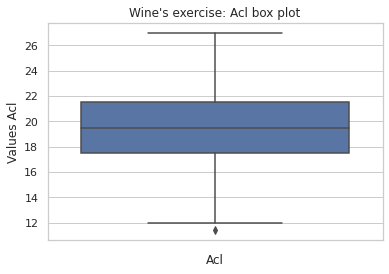

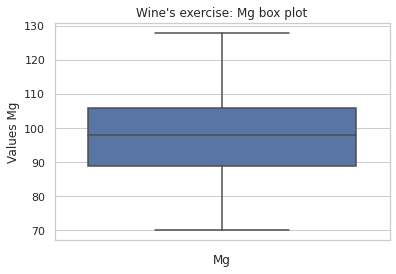

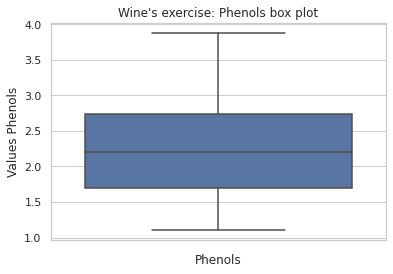

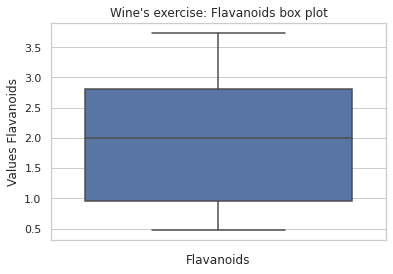

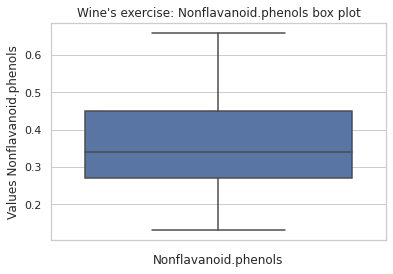

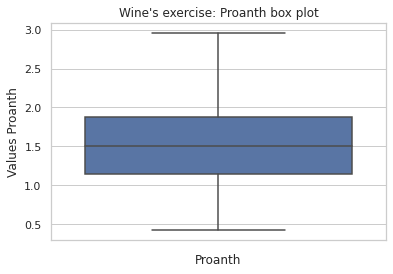

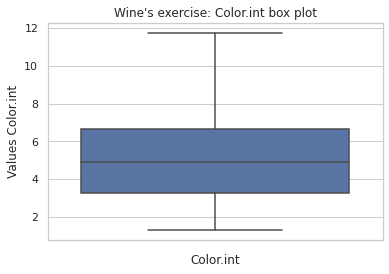

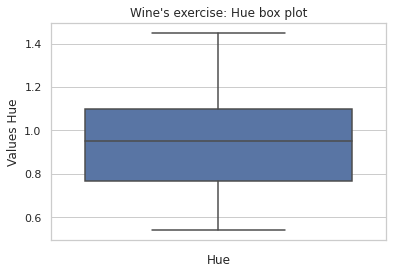

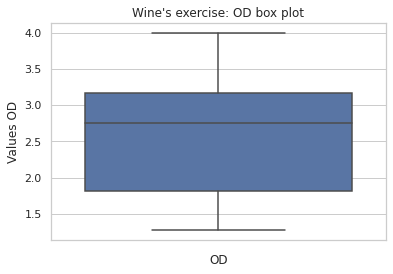

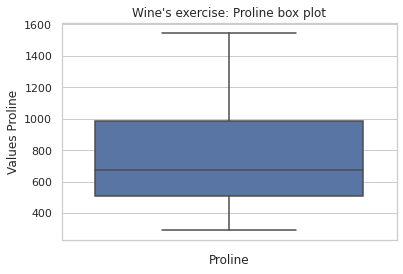

In [9]:
#Deleting outlayers.
X = remove_outlayers_in_df(X)
y  = y[y.index.isin(X.index)]
print(X.shape)
print(y.shape)
plot_box_plots_real_variables(X)

Variable of analysis : Wine
Total number of variable values : 3

   values  count
0       2     44
1       1     43
2       3     41



<Figure size 432x288 with 0 Axes>

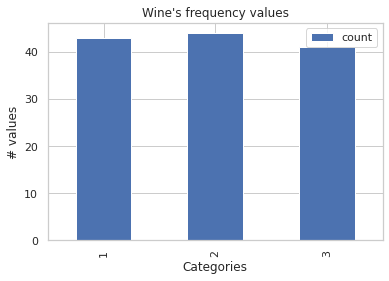

In [10]:
#EDA for target variable.
bar_plot_categorical_columns(y.to_frame(), 'Wine',0)
table_categorical_columns(y.to_frame(), 'Wine',0)

<h3>4. Feature selection</h3>
<p>The main important variables are obtained through information gain (for feature selection), and correlation analysis over the independent variables.</p>
<p> - This is useful in cases where dimensionality reduction is needed (set of heavy dimensions).</p>

In [11]:
#Determine the mutual information.
#Features having the highest values in mutual information are the best explanators.
df_mutual = giving_mutual_info(X, y)
print(df_mutual)

Flavanoids              0.767471
OD                      0.620145
Proline                 0.586712
Color.int               0.552910
Phenols                 0.478596
Hue                     0.467481
Alcohol                 0.453780
Acl                     0.362653
Proanth                 0.340415
Malic.acid              0.251754
Nonflavanoid.phenols    0.176669
Mg                      0.157745
Ash                     0.054461
dtype: float64


In [23]:
#Obtaining columns names for the best k-feature xplanators.
k = 7
columns = df_mutual.iloc[0:k].index
print(columns)

#Filtering variables in X, and X_test datasets.
X = X[columns]
X_test = X_test[columns]

#Check shapes.
print(X.shape)
print(X.shape)

Index(['Flavanoids', 'OD', 'Proline', 'Color.int', 'Phenols', 'Hue',
       'Alcohol'],
      dtype='object')


/home/juan-david/Documents/data_science/UGA_phd/UGA_exercise_functions_help.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sns.boxplot(  y=i, data=df,  orient='v')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

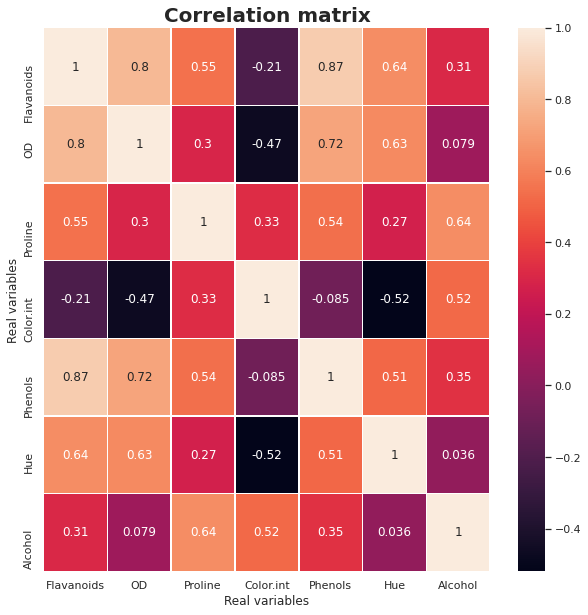

<Figure size 720x720 with 0 Axes>

In [13]:
#Correlation matrix.
create_corrMatrix(X)

In [14]:
#Variables that are so much correlated could be delete giving a threshold boundary.
#Deleting variables that have more that 0.85 of correlation.
corr_variables_to_delete = ['Phenols']

X = X.drop(corr_variables_to_delete, axis=1)
X_test = X_test.drop(corr_variables_to_delete, axis=1)

#Check shapes.
print(X.shape)
print(X_test.shape)

(128, 6)
(36, 6)


<h3>5. Training of classifiers for model selection</h3>
<p>Trained models are evaluated with 3-Fold cross validation.</p>
<p> - Hyperparameter tuning is not done within this analysis.</p>
<p> - Pipelines are done in order to standardize the data, and train the models on a single step(scikit-learn).</p>
<p> - The selected performance statistic is "precision", being this taks a multiclass classification problem, with categorical values in the targe having different proportions.</p>

In [15]:
#Referencing the precision score and the k-folds in cross validation.
scoring = {'precision' : make_scorer(precision_score, average='weighted')}
k_folds = 5

In [16]:
#Training a SVM classifier.
#Creating pipeline.
scaler_svm = MinMaxScaler()
clf_svm = svm.SVC(kernel='linear', C=1, random_state=42)
pipeline_svm = Pipeline([('transformer',scaler_svm),('estimator',clf_svm)])

#Training the svm model with k-fold cross validation.
scores_svm = cross_validate(pipeline_svm, X, y, cv=k_folds, scoring=scoring)

#Results over validation tests(hold out tests).
avg_scores_svm = np.mean(scores_svm['test_precision'])
print(scores_svm['test_precision'])
print(avg_scores_svm)

[0.96581197 0.93846154 1.         1.         0.96444444]
0.9737435897435898


In [17]:
#Training a decision tree classifier.
#Creating pipeline.
scaler_tree = MinMaxScaler()
clf_tree = tree.DecisionTreeClassifier(max_depth=2)
pipeline_tree = Pipeline([('transformer',scaler_tree),('estimator',clf_tree)])

#Training the decision tree model with k-fold cross validation.
scores_tree = cross_validate(pipeline_tree, X, y, cv=k_folds, scoring=scoring)

#Results over validation tests(hold out tests).
avg_scores_tree = np.mean(scores_tree['test_precision'])
print(scores_tree['test_precision'])
print(avg_scores_tree)

[0.92692308 1.         0.89615385 0.964      0.93454545]
0.9443244755244755


23
[1.         0.96581197 1.         1.         0.92888889]
0.9789401709401708


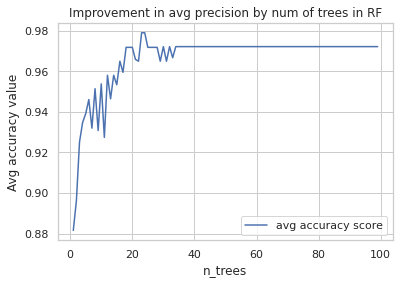

In [18]:
#Training a random forest classifier.
iters = []
avg_scores = []
for i in range(1,100):
    #Creating pipeline.
    scaler_rf = MinMaxScaler()
    clf_rf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators =i)
    pipeline_rf = Pipeline([('transformer',scaler_rf),('estimator',clf_rf)])

    #Training the rf model with k-fold cross validation.
    scores_rf = cross_validate(pipeline_rf, X, y, cv=k_folds, scoring=scoring)
    
    #Results over validation tests(hold out tests).
    avg_scores_rf = np.mean(scores_rf['test_precision'])
    iters.append(i)
    avg_scores.append(avg_scores_rf)

df_rf_scores = pd.concat([pd.DataFrame(iters),pd.DataFrame(avg_scores)],axis =1)
df_rf_scores.columns = ['n_trees','avg accuracy score']
df_rf_scores.index = df_rf_scores['n_trees']
df_rf_scores.plot.line(x='n_trees', y='avg accuracy score')
plt.title("Improvement in avg precision by num of trees in RF")
plt.xlabel('n_trees')
plt.ylabel('Avg accuracy value')
#print(df_rf_scores['avg accuracy score'].max())
results = df_rf_scores[df_rf_scores['avg accuracy score'] == df_rf_scores['avg accuracy score'].max()]
results = results['n_trees'].iloc[0:1].values
print(results[0])

#Creating pipeline.
scaler_rf = MinMaxScaler()
clf_rf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators =results[0])
pipeline_rf = Pipeline([('transformer',scaler_rf),('estimator',clf_rf)])

#Training the rf model with k-fold cross validation.
scores_rf = cross_validate(pipeline_rf, X, y, cv=k_folds, scoring=scoring)

#Results over validation tests(hold out tests).
avg_scores_rf = np.mean(scores_rf['test_precision'])
print(scores_rf['test_precision'])
print(avg_scores_rf)

In [19]:
#Training a neural network classifier.
#Creating pipeline.
scaler_mlp = MinMaxScaler()
clf_mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='relu', solver='adam', max_iter=500)
pipeline_mlp = Pipeline([('transformer',scaler_mlp),('estimator',clf_mlp)])

#Training the NN model with k-fold cross validation.
scores_mlp = cross_validate(pipeline_mlp, X, y, cv=k_folds, scoring=scoring)

#Results over validation tests(hold out tests).
avg_scores_mlp = np.mean(scores_mlp['test_precision'])
print(scores_mlp['test_precision'])
print(avg_scores_mlp)

/home/juan-david/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/juan-david/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/juan-david/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/juan-david/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

[1.         0.35347985 0.86153846 0.56121212 0.46444444]
0.6481349761349762


/home/juan-david/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/juan-david/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>6. Prediction with selected model : RF(23 trees) </h3>
<p>Prediction of wine types using the model with highest performance score.</p>
<p> - Predictions, and their evaluation are done over data that the model hasn't seen before (obtained from the 2 phase).</p>
<p> - A clear example of how standardization of the data may improve the results of the model.</p>

In [20]:
#Prediction over data that hasn't seen by the model. 
#Standardizing the data.
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X_test =  scaler.transform(X_test)

#making predictions.
y_pred = clf_rf.fit(X, y).predict(X_test)

#Calculate the precision with y_test, and the predicted values.
score = precision_score(y_test, y_pred, average='weighted')

#We could see the differences between the obtained results, and the ones from the validation set.
print(score)

0.9502645502645503


<h3>7. Conclusions</h3>
<p> - Several classifiers are available to predict a multi class target variable.</p>
<p> - Within the exercise, it was the random forest (Rf) with 23 trees, and a max depth of 2, the one that performed the best. Its minimal  precision metric value was 0.9288, and its best prediction value was 1.</p>
<p> - Cross validaton allows us to check how good and how bad a classifier could be for generalizing the values of a target variable.</p>
<p> - The RF selected classifier gave a 95% of precision result when classifying the enseen labels of wine.</p>
<p> - Data Science projets often require a phase in which data is filtered and cleaned, a phase in which data is explored, a phase in which features are selected, a phase in which models are trained, a phase in which the best performing model is selected, a generalization of unseen data phase (predictions), and a final phase in which a model is deployed in streaming.</p>